In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [16]:
DATA_URL = '../../data/SAMSum/'

In [23]:
with open(DATA_URL + 'train.json', 'r') as f:
    training_data: list = json.load(f)
with open(DATA_URL + 'val.json', 'r') as f:
    validation_data: list = json.load(f)
with open(DATA_URL + 'test.json', 'r') as f:
    testing_data: list = json.load(f)

In [26]:
for title, data in zip(['training', 'validation', 'testing'], [training_data, validation_data, testing_data]):
    print(f'There are {len(data)} {title} examples, each with the following columns: {list(data[0].keys())}.')

There are 14732 training examples, each with the following columns: ['id', 'summary', 'dialogue'].
There are 818 validation examples, each with the following columns: ['id', 'summary', 'dialogue'].
There are 819 testing examples, each with the following columns: ['id', 'summary', 'dialogue'].


In [34]:
training_df = pd.DataFrame(training_data)
validation_df = pd.DataFrame(validation_data)
testing_df = pd.DataFrame(testing_data)

def add_feature_lengths(df: pd.DataFrame):
    """
    Add the lengths of the input and output sequences to the dataframe.
    """
    df['dialogue_length'] = df['dialogue'].str.len()
    df['summary_length'] = df['summary'].str.len()

add_feature_lengths(training_df)
add_feature_lengths(validation_df)
add_feature_lengths(testing_df)

print(training_df.head(1))

         id                                            summary  \
0  13818513  Amanda baked cookies and will bring Jerry some...   

                                            dialogue  dialogue_length  \
0  Amanda: I baked  cookies. Do you want some?\r\...               94   

   summary_length  
0              56  


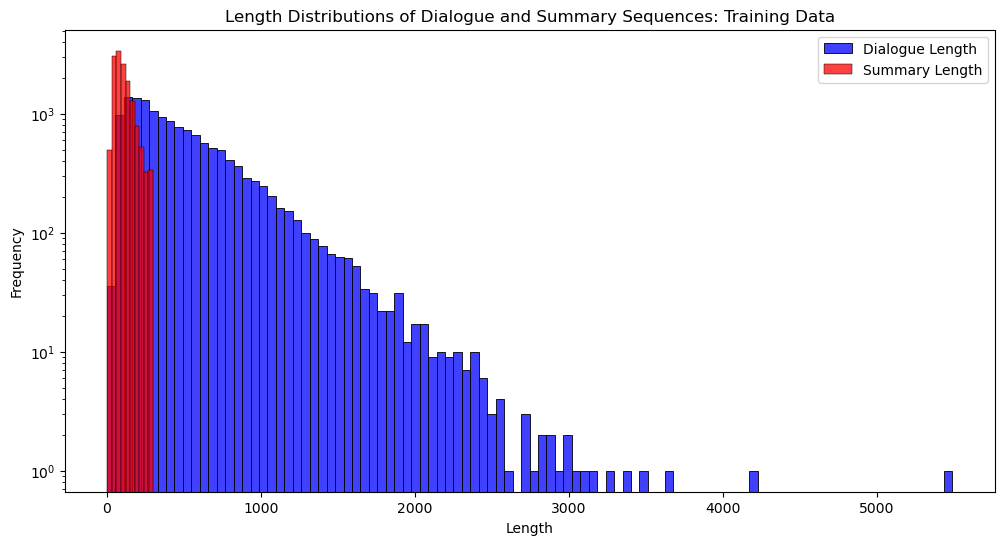

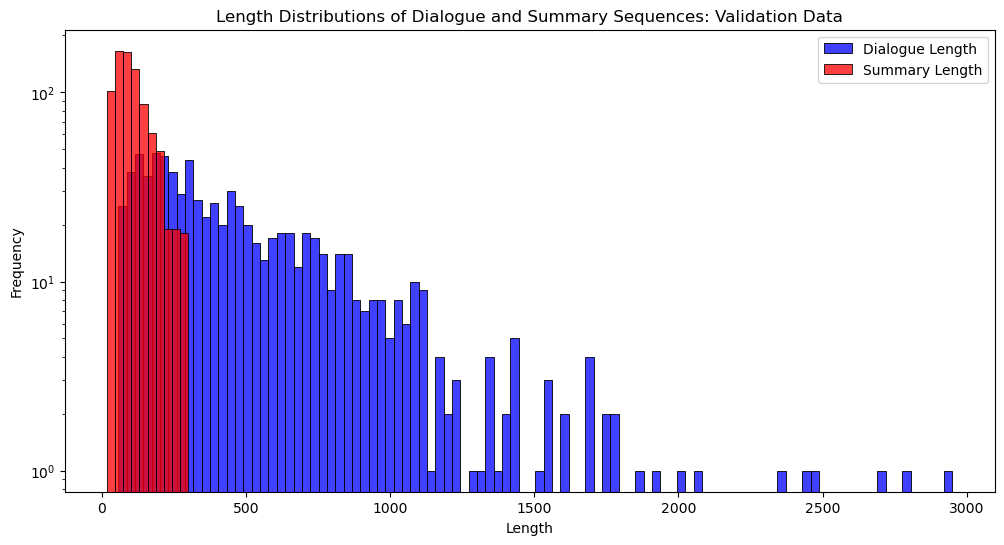

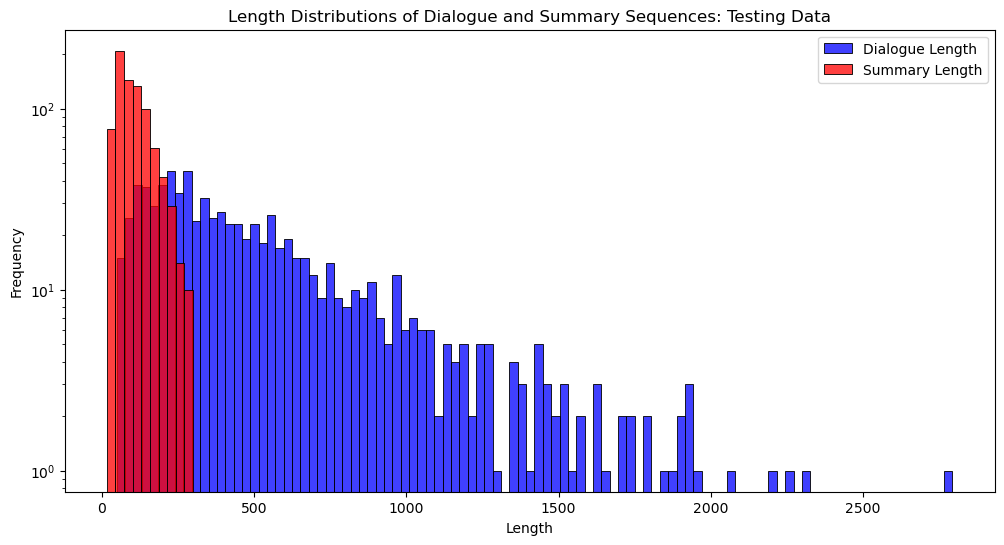

In [40]:
def plot_length_distribution(df: pd.DataFrame, title: str):
    """
    Plot the distribution of the lengths of the dialogue and summary sequences.
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(df['dialogue_length'], bins = 100, color = 'blue', label = 'Dialogue Length')
    sns.histplot(df['summary_length'], bins = 10, color = 'red', label = 'Summary Length')
    plt.title(f'Length Distributions of Dialogue and Summary Sequences: {title}')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.legend()
    plt.show()

plot_length_distribution(training_df, 'Training Data')
plot_length_distribution(validation_df, 'Validation Data')
plot_length_distribution(testing_df, 'Testing Data')